<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.146568,128.089109,127.936799,0.152309
1,0.0,1.0,47.067808,95.047509,91.779690,-0.219056,243.675951,244.002489,-0.326537
2,0.0,2.0,99.291665,61.179446,95.992578,-0.009959,266.453730,266.520483,-0.066752
3,0.0,3.0,36.059748,81.961304,62.806562,0.054140,190.881754,190.892882,-0.011128
4,0.0,4.0,22.561835,57.403703,99.891733,-0.163465,189.693806,189.973541,-0.279735
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.189110,120.241396,120.125141,0.116256
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.012894,230.880574,230.853054,0.027520
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.058303,203.539103,203.543447,-0.004344
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.064395,116.216705,116.387291,-0.170586


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.146568,128.089109,127.936799,0.152309
1,0.0,1.0,47.067808,95.047509,91.779690,-0.219056,243.675951,244.002489,-0.326537
2,0.0,2.0,99.291665,61.179446,95.992578,-0.009959,266.453730,266.520483,-0.066752
3,0.0,3.0,36.059748,81.961304,62.806562,0.054140,190.881754,190.892882,-0.011128
4,0.0,4.0,22.561835,57.403703,99.891733,-0.163465,189.693806,189.973541,-0.279735
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.189110,120.241396,120.125141,0.116256
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.012894,230.880574,230.853054,0.027520
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.058303,203.539103,203.543447,-0.004344
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.064395,116.216705,116.387291,-0.170586


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  37.451801  35.866901  ...  128.089109  127.936799  0.152309
      1.0    47.067808  95.047509  91.779690  ...  243.675951  244.002489 -0.326537
      2.0    99.291665  61.179446  95.992578  ...  266.453730  266.520483 -0.066752
      3.0    36.059748  81.961304  62.806562  ...  190.881754  190.892882 -0.011128
      4.0    22.561835  57.403703  99.891733  ...  189.693806  189.973541 -0.279735
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.165046  31.666469  56.220772  ...  120.241396  120.125141  0.116256
      26.0   93.324773  99.972234  27.596461  ...  230.880574  230.853054  0.027520
      27.0   28.102838  93.083445  72.411123  ...  203.539103  203.543447 -0.004344
      28.0   30.257867  20.848863  55.174370  ...  116.216705  116.387291 -0.170586
      29.0   90.716789  93.036058  71.241563  ...  265.174588  265.004554  0.170035

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  37.451801  35.866901  ...  128.089109  127.936799  0.152309
      1.0    47.067808  95.047509  91.779690  ...  243.675951  244.002489 -0.326537
      2.0    99.291665  61.179446  95.992578  ...  266.453730  266.520483 -0.066752
      3.0    36.059748  81.961304  62.806562  ...  190.881754  190.892882 -0.011128
      4.0    22.561835  57.403703  99.891733  ...  189.693806  189.973541 -0.279735
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.165046  31.666469  56.220772  ...  120.241396  120.125141  0.116256
      26.0   93.324773  99.972234  27.596461  ...  230.880574  230.853054  0.027520
      27.0   28.102838  93.083445  72.411123  ...  203.539103  203.543447 -0.004344
      28.0   30.257867  20.848863  55.174370  ...  116.216705  116.387291 -0.170586
      29.0   90.716789  93.036058  71.241563  ...  265.174588  265.004554  0.170035

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.146568,128.089109,127.936799,0.152309
1,0.0,1.0,47.067808,95.047509,91.779690,-0.219056,243.675951,244.002489,-0.326537
2,0.0,2.0,99.291665,61.179446,95.992578,-0.009959,266.453730,266.520483,-0.066752
3,0.0,3.0,36.059748,81.961304,62.806562,0.054140,190.881754,190.892882,-0.011128
4,0.0,4.0,22.561835,57.403703,99.891733,-0.163465,189.693806,189.973541,-0.279735
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.189110,120.241396,120.125141,0.116256
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.012894,230.880574,230.853054,0.027520
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.058303,203.539103,203.543447,-0.004344
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.064395,116.216705,116.387291,-0.170586


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  37.451801  35.866901  ...  128.089109  127.936799  0.152309
      1.0    47.067808  95.047509  91.779690  ...  243.675951  244.002489 -0.326537
      2.0    99.291665  61.179446  95.992578  ...  266.453730  266.520483 -0.066752
      3.0    36.059748  81.961304  62.806562  ...  190.881754  190.892882 -0.011128
      4.0    22.561835  57.403703  99.891733  ...  189.693806  189.973541 -0.279735
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.165046  31.666469  56.220772  ...  120.241396  120.125141  0.116256
      26.0   93.324773  99.972234  27.596461  ...  230.880574  230.853054  0.027520
      27.0   28.102838  93.083445  72.411123  ...  203.539103  203.543447 -0.004344
      28.0   30.257867  20.848863  55.174370  ...  116.216705  116.387291 -0.170586
      29.0   90.716789  93.036058  71.241563  ...  265.174588  265.004554  0.170035

[30000 rows x 7 columns]

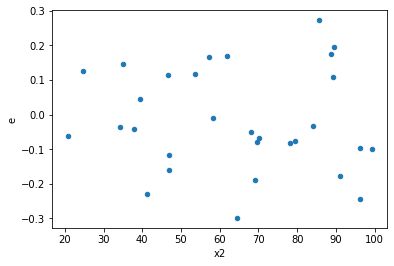

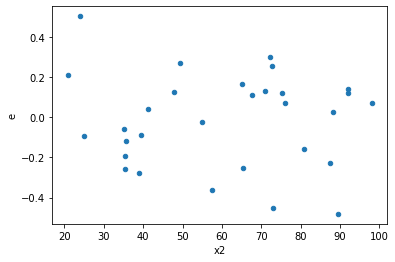

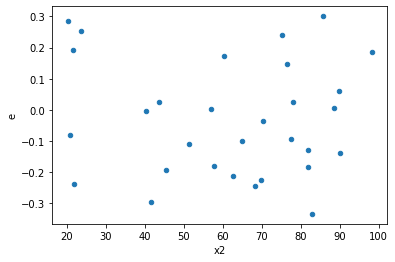

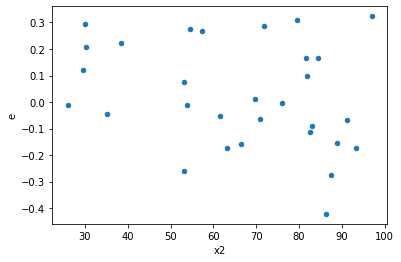

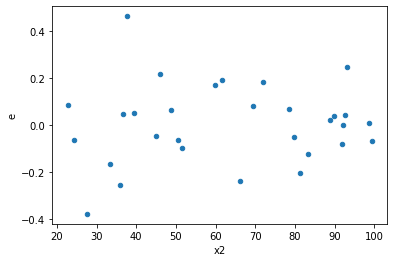

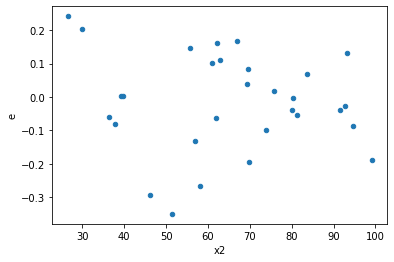

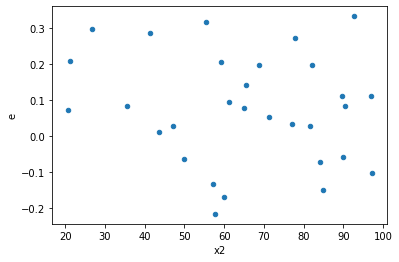

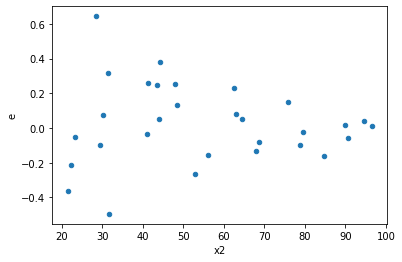

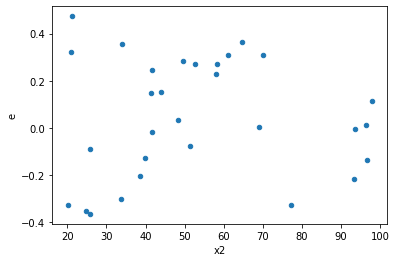

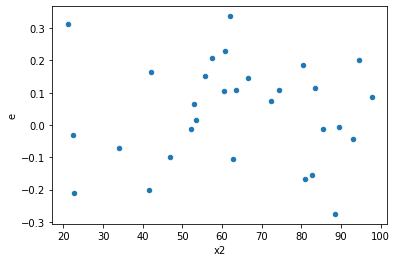

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,9.0,9.0,0.2598169836208947,0.2818096230924293,0.02886855373565497,0.03131218034360325,1.0846466584479502,0.9056451433269195,0.5471774283365403,0.45282257166345974,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,0.1723374376642159,0.2650536835370595,0.019148604184912876,0.0294504092818955,1.5379924822457494,0.5314902355894355,0.7342548822052822,0.26574511779471777,Reject005=1 : Homoscedasticity
11.0,9.0,9.0,0.32290454783581407,0.6816486199166195,0.03587828309286823,0.07573873554629106,2.110991079206523,0.2809635742327876,0.8595182128836062,0.1404817871163938,Reject005=1 : Homoscedasticity
13.0,9.0,9.0,0.292315397396089,0.5293315438657001,0.03247948859956545,0.05881461598507779,1.810823338698279,0.38964451880251505,0.8051777405987425,0.19482225940125752,Reject005=1 : Homoscedasticity
16.0,9.0,9.0,0.1564658493248154,0.1937035386907721,0.017385094369423933,0.021522615410085787,1.23799244069326,0.7556526136056276,0.6221736931971862,0.3778263068028138,Reject005=1 : Homoscedasticity
19.0,9.0,9.0,0.19440642916851972,0.2013504278203824,0.021600714352057748,0.022372269757820265,1.0357189763813999,0.9591636190079045,0.5204181904960478,0.47958180950395224,Reject005=1 : Homoscedasticity
20.0,9.0,9.0,0.21397425120858862,0.41261177505621516,0.023774916800954293,0.045845752784023905,1.9283244256057173,0.34216913603773436,0.8289154319811328,0.17108456801886718,Reject005=1 : Homoscedasticity
21.0,9.0,9.0,0.3197250135292357,0.36053249988200237,0.035525001503248416,0.04005916665355582,1.1276330741292946,0.8609194763265247,0.5695402618367377,0.43045973816326233,Reject005=1 : Homoscedasticity
23.0,9.0,9.0,0.24864746021159626,0.380211971704721,0.02762749557906625,0.04224577463385789,1.5291206730250322,0.5369812202357462,0.7315093898821269,0.2684906101178731,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.7288564504234106,0.27282592952508755,0.08098405004704562,0.03031399216945417,0.3743205254842655,0.15940171908628395,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,0.6073050644167778,0.2819387645039191,0.06747834049075309,0.03132652938932434,0.4642456996051523,0.26845282945477394,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,0.7170669585003568,0.15209048778255252,0.07967410650003964,0.01689894308695028,0.21210081705706824,0.030376504156502993,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,0.2345535746256519,0.22874331242717308,0.026061508291739102,0.025415923603019232,0.9752284218743968,0.9708070012034169,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,0.2598169836208947,0.2818096230924293,0.02886855373565497,0.03131218034360325,1.0846466584479502,0.9056451433269195,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,0.38405911531432,0.35544189503428986,0.04267323503492445,0.03949354389269887,0.9254874597713704,0.9100601527437366,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,0.8728287089515478,0.17953048297688476,0.0969809676612831,0.019947831441876084,0.20568810482017585,0.027488738749663743,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,1.0023495984983717,0.16825571992781885,0.11137217761093018,0.018695079991979873,0.16786131323829945,0.013869578560495989,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,0.6791212325547351,0.15702683244144586,0.0754579147283039,0.017447425826827317,0.23122061999260193,0.0400178701826378,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      803
Reject005=0 : Heteroscedasticity    197
Name: Result_test, dtype: int64